### Improving Neural Network Performance
#### 3. Normalization
        - Normalizing inputs (This is Feature Scaling )
        - Batch Normalization
        - Normalizing Activations
        
Unnoramlize input can affect the performs of neural network, we are understand by example.        

### Import Libraries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns

### Importing Data set

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/sahdevsaini/Data-Set/main/Social_Network_Ads.csv')

### Dependent & Independent Features

In [33]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<AxesSubplot: xlabel='Age', ylabel='EstimatedSalary'>

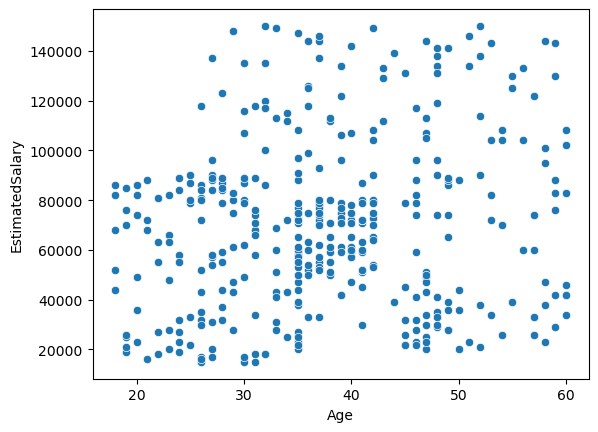

In [34]:
sns.scatterplot(x= df.iloc[:,0],y= df.iloc[:,1])

In [35]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

### Spliting data into test & Train

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [37]:
#pip install tensorflow

In [38]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [39]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,verbose = 0)

### Loss & Accuracy of the model

In [43]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the loss and accuracy
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy*100}")


Loss: 93.86589050292969
Accuracy: 40.00000059604645


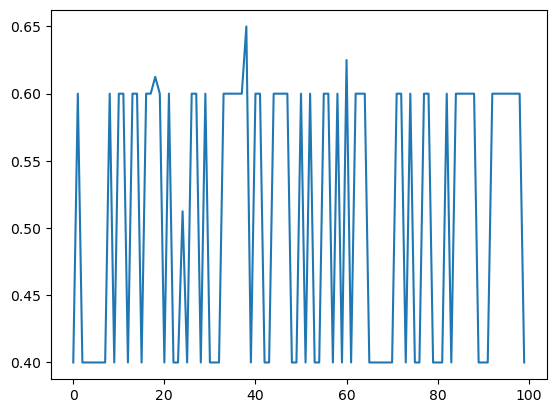

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

# Applying Feature Scaling

### Data Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
#X_train_scaled

<AxesSubplot: >

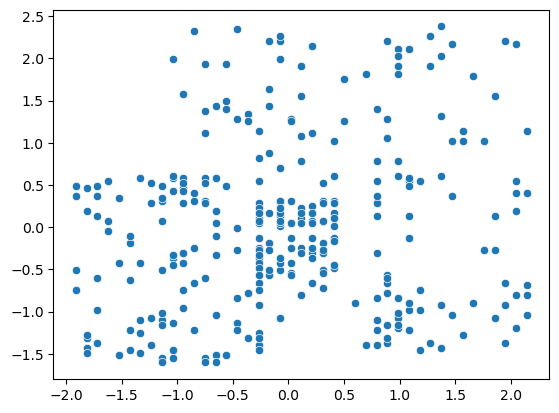

In [47]:
sns.scatterplot(x= X_train_scaled[:,0],y= X_train_scaled[:,1])

### Creating  Model

In [54]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100,verbose = 1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4290 - loss: 0.6641 - val_accuracy: 0.7625 - val_loss: 0.6121
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7532 - loss: 0.6121 - val_accuracy: 0.8625 - val_loss: 0.5645
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8207 - loss: 0.5842 - val_accuracy: 0.9000 - val_loss: 0.5244
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8406 - loss: 0.5445 - val_accuracy: 0.8625 - val_loss: 0.4895
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8500 - loss: 0.5029 - val_accuracy: 0.8500 - val_loss: 0.4577
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8556 - loss: 0.4852 - val_accuracy: 0.8375 - val_loss: 0.4302
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8790 - loss: 0.4425 - val_accuracy: 0.8250 - val_loss: 0.4059
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8556 - loss: 0.4235 - val_accuracy: 0.8500 - 

In [56]:
# Evaluate the model on the test data
Scal_loss, Scal_accuracy = model.evaluate(X_test_scaled,y_test, verbose=0)

# Print the loss and accuracy
print(f"Loss: {Scal_loss}")
print(f"Accuracy: {Scal_accuracy*100}")


Loss: 0.26128894090652466
Accuracy: 92.5000011920929


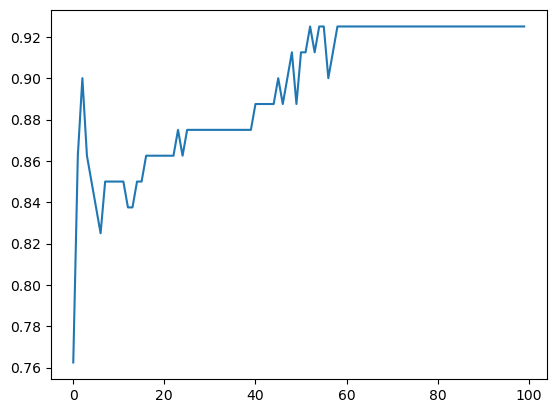

In [57]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

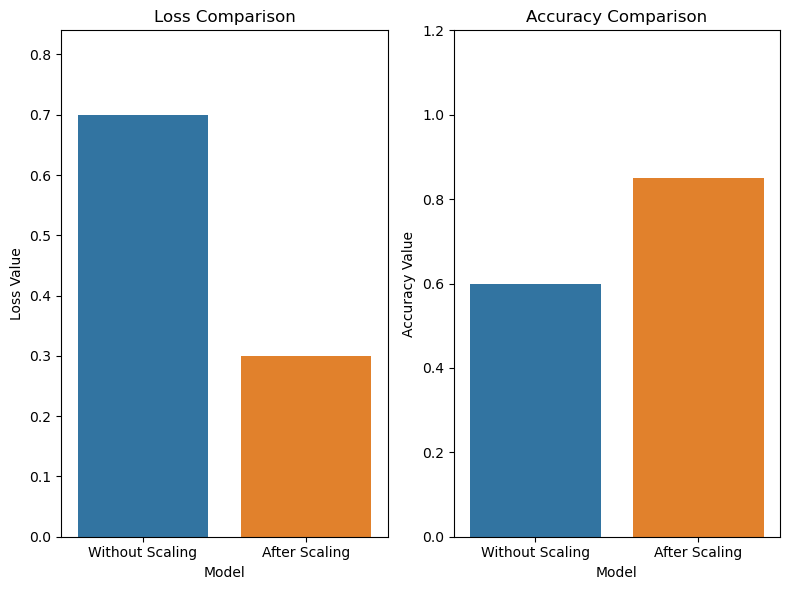

In [64]:
# Create separate DataFrames for Loss and Accuracy
data_loss = {
    'Model': ['Without Scaling', 'After Scaling'],
    'Loss': [loss, Scal_loss]
}

data_accuracy = {
    'Model': ['Without Scaling', 'After Scaling'],
    'Accuracy': [accuracy, Scal_accuracy]  # Corrected 'Accuracy' here
}

df_loss = pd.DataFrame(data_loss)
df_accuracy = pd.DataFrame(data_accuracy)

# Plot Loss
plt.figure(figsize=(8,6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x='Model', y='Loss', data=df_loss)
plt.title('Loss Comparison')
plt.ylabel('Loss Value')
plt.ylim(0, max(loss, Scal_loss) * 1.2)  # Adjusting the y-axis limit for better visualization

# Plot Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x='Model', y='Accuracy', data=df_accuracy)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy Value')
plt.ylim(0, 1.2)  # Assuming accuracy is a percentage (0-1 scale)

# Adjust layout
plt.tight_layout()
plt.show()
